In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('../housing.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
house.dropna(inplace=True)

In [5]:
house.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
X = house.drop('median_house_value', axis=1)
y = house.median_house_value

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
split

StratifiedShuffleSplit(n_splits=1, random_state=123, test_size=0.2,
            train_size=None)

In [10]:
(train_idx, test_idx), = split.split(X, X['ocean_proximity'])

In [11]:
train_idx

array([10398,  5066,  9437, ...,  3567, 10068,  3442], dtype=int64)

In [13]:
test_idx

array([20099,  7504,  8034, ..., 10468, 10180,   200], dtype=int64)

In [14]:
def stratified_sampling(X, y, col, test_size=0.2, random_state=123):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_idx, test_idx in split.split(X, X[col]):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = stratified_sampling(X, y, 'ocean_proximity')

In [17]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10505,-117.72,33.43,5.0,1889.0,359.0,616.0,246.0,3.8992,<1H OCEAN
5120,-118.30,33.96,47.0,2112.0,417.0,1161.0,368.0,3.9722,<1H OCEAN
9529,-123.15,38.94,22.0,2163.0,436.0,1048.0,358.0,2.7171,<1H OCEAN
1545,-121.93,37.73,8.0,831.0,231.0,404.0,224.0,3.3750,<1H OCEAN
3310,-122.63,38.94,18.0,3844.0,969.0,1832.0,845.0,1.1250,INLAND
...,...,...,...,...,...,...,...,...,...
5220,-118.24,33.95,36.0,2316.0,543.0,1938.0,507.0,1.2500,<1H OCEAN
8675,-118.32,33.87,28.0,3763.0,762.0,1967.0,724.0,5.3244,<1H OCEAN
3597,-118.50,34.25,32.0,2333.0,389.0,969.0,331.0,4.8164,<1H OCEAN
10169,-117.94,33.90,27.0,2029.0,242.0,711.0,254.0,9.7956,<1H OCEAN


In [18]:
y_train

10505    500001.0
5120     117400.0
9529      95800.0
1545     350000.0
3310      81800.0
           ...   
5220      97400.0
8675     271900.0
3597     241100.0
10169    500001.0
3469     192200.0
Name: median_house_value, Length: 16346, dtype: float64

In [19]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20303,-119.18,34.16,12.0,460.0,101.0,405.0,103.0,5.2783,NEAR OCEAN
7587,-118.23,33.90,34.0,2462.0,553.0,2334.0,502.0,1.6410,<1H OCEAN
8121,-118.19,33.79,41.0,2114.0,612.0,2357.0,529.0,1.7938,NEAR OCEAN
8566,-118.42,33.93,39.0,2988.0,605.0,1466.0,610.0,4.9286,<1H OCEAN
19322,-123.00,38.51,33.0,1565.0,390.0,759.0,311.0,2.6726,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
8205,-118.16,33.78,33.0,2048.0,585.0,2074.0,597.0,2.0156,NEAR OCEAN
9164,-118.47,34.42,25.0,3223.0,524.0,1763.0,508.0,5.2887,<1H OCEAN
10575,-117.69,33.65,15.0,5394.0,748.0,2383.0,706.0,7.5619,<1H OCEAN
10283,-117.76,33.87,16.0,3973.0,595.0,1971.0,575.0,6.4265,<1H OCEAN


In [20]:
y_test

20303    167400.0
7587      96800.0
8121     142600.0
8566     341400.0
19322    153100.0
           ...   
8205     152700.0
9164     183000.0
10575    302000.0
10283    263700.0
200       80800.0
Name: median_house_value, Length: 4087, dtype: float64

In [28]:
X_train.drop('ocean_proximity', axis=1, inplace=True)
X_test.drop('ocean_proximity', axis=1, inplace=True)


C:\Users\hello\AppData\Local\Temp\ipykernel_29864\3252897307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('ocean_proximity', axis=1, inplace=True)
C:\Users\hello\AppData\Local\Temp\ipykernel_29864\3252897307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop('ocean_proximity', axis=1, inplace=True)


In [29]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
models = [
    ('linear regression', LinearRegression()),
    ('SGD', SGDRegressor()),
    ('Tree', RandomForestRegressor()),
    ('Knn_model', KNeighborsRegressor())
]

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

In [33]:
for name, model in models:
    print(f"Model name: {name}")
    model.fit(X_train, y_train)
    y_hat = model.predict(X_train)
    print(f"Training error for  {name}: {mean_absolute_error(y_train, y_hat):.2f}")
    print(f"Training accuracy for {name}: {r2_score(y_train, y_hat)}")
    print()

    y_hat = model.predict(X_test)
    print(f"Testing error for  {name}: {mean_absolute_error(y_test, y_hat):.2f}")
    print(f"Testing accuracy for {name}: {r2_score(y_test, y_hat)}")
    print()

Model name: linear regression
Training error for  linear regression: 50956.02
Training accuracy for linear regression: 0.6350862075555035

Testing error for  linear regression: 50622.31
Testing accuracy for linear regression: 0.6438089301328178

Model name: SGD
Training error for  SGD: 469303816083847.62
Training accuracy for SGD: -4.176384116868237e+19

Testing error for  SGD: 478985526050662.81
Testing accuracy for SGD: -4.496416017067022e+19

Model name: Tree
Training error for  Tree: 11787.58
Training accuracy for Tree: 0.9749399094723286

Testing error for  Tree: 31981.43
Testing accuracy for Tree: 0.8113690948841954

Model name: Knn_model
Training error for  Knn_model: 61892.52
Training accuracy for Knn_model: 0.5159350799148933

Testing error for  Knn_model: 77929.21
Testing accuracy for Knn_model: 0.2252236096221264



In [ ]:
def stratified_sampling(X, y, col, test_size=0.2, random_state=123):
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    for train_idx, test_idx in split.split(X, X[col]):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    return X_train, X_test, y_train, y_test

In [37]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
ls = []
for i in split.split(X, X['ocean_proximity']):
    ls.append(i)

In [38]:
ls

[(array([10398,  5066,  9437, ...,  3567, 10068,  3442], dtype=int64),
  array([20099,  7504,  8034, ..., 10468, 10180,   200], dtype=int64)),
 (array([ 2396,  7082,   713, ..., 15519, 13454, 16029], dtype=int64),
  array([ 7516,  1676, 15309, ..., 15961,  9099,  5019], dtype=int64)),
 (array([10989, 14643, 12253, ...,  4733,  3634, 18102], dtype=int64),
  array([17909,  1708,  5893, ...,  6140, 14554, 17492], dtype=int64)),
 (array([16814,  9286, 18852, ...,   111, 16531,  1872], dtype=int64),
  array([  373,  8244, 13599, ...,  1440, 19983,  9466], dtype=int64)),
 (array([ 5774,  8003, 12791, ..., 18150, 13186,    17], dtype=int64),
  array([ 4109, 15914, 11920, ...,  7851,  8413, 15330], dtype=int64))]

In [39]:
ls[0]

(array([10398,  5066,  9437, ...,  3567, 10068,  3442], dtype=int64),
 array([20099,  7504,  8034, ..., 10468, 10180,   200], dtype=int64))

In [40]:
for i in ls:
    print(i)

(array([10398,  5066,  9437, ...,  3567, 10068,  3442], dtype=int64), array([20099,  7504,  8034, ..., 10468, 10180,   200], dtype=int64))
(array([ 2396,  7082,   713, ..., 15519, 13454, 16029], dtype=int64), array([ 7516,  1676, 15309, ..., 15961,  9099,  5019], dtype=int64))
(array([10989, 14643, 12253, ...,  4733,  3634, 18102], dtype=int64), array([17909,  1708,  5893, ...,  6140, 14554, 17492], dtype=int64))
(array([16814,  9286, 18852, ...,   111, 16531,  1872], dtype=int64), array([  373,  8244, 13599, ...,  1440, 19983,  9466], dtype=int64))
(array([ 5774,  8003, 12791, ..., 18150, 13186,    17], dtype=int64), array([ 4109, 15914, 11920, ...,  7851,  8413, 15330], dtype=int64))


In [41]:
for train_idx, test_idx in ls:
    print(train_idx)
    print(test_idx)
    print()

[10398  5066  9437 ...  3567 10068  3442]
[20099  7504  8034 ... 10468 10180   200]

[ 2396  7082   713 ... 15519 13454 16029]
[ 7516  1676 15309 ... 15961  9099  5019]

[10989 14643 12253 ...  4733  3634 18102]
[17909  1708  5893 ...  6140 14554 17492]

[16814  9286 18852 ...   111 16531  1872]
[  373  8244 13599 ...  1440 19983  9466]

[ 5774  8003 12791 ... 18150 13186    17]
[ 4109 15914 11920 ...  7851  8413 15330]



In [42]:
arr = np.random.normal(170, 20, 1000)


C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

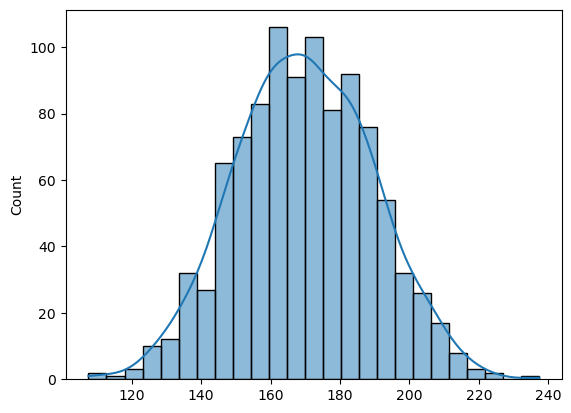

In [44]:
sns.histplot(arr, kde=True)

In [45]:
min(arr)

107.58383902306528

In [46]:
max(arr)

237.38765118671208

In [48]:
arr1 = np.random.randn(1000)

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

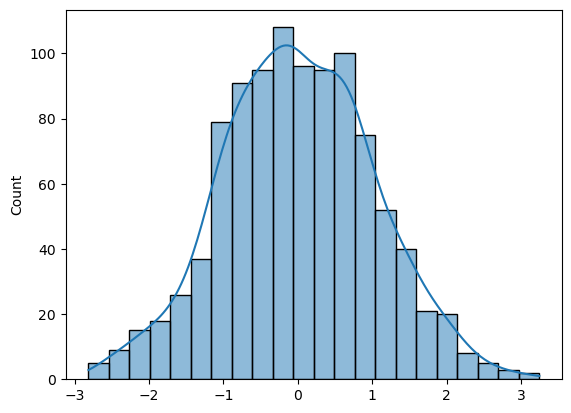

In [49]:
sns.histplot(arr1, kde=True)


In [49]:
import numpy as np

In [50]:
ls = [10, 6, 4, 3 ,8, 7, 12, 2]

In [51]:
min(ls)

2

In [52]:
max(ls)

12

In [53]:
arr = np.array(ls)
arr

array([10,  6,  4,  3,  8,  7, 12,  2])

In [54]:
def standard_scale_normalization(X):
    normalize = (X - X.mean()) / X.std()
    return normalize

In [55]:
standard_scale_normalization(arr)

array([ 1.08012345, -0.15430335, -0.77151675, -1.08012345,  0.46291005,
        0.15430335,  1.69733685, -1.38873015])

In [40]:
arr.sum() / len(arr)

6.5

In [41]:
arr.std()

3.24037034920393

In [56]:
normal = np.random.normal(150, 20, 1000)
normal

array([132.08379978, 119.26077348, 164.33717947, 121.57959045,
       162.67708273, 112.73086271, 141.11926802, 119.6555952 ,
       156.12305625, 158.24513946, 140.18024602, 115.79461744,
       147.46063924, 179.71840082, 126.13307668, 133.83012388,
       118.77419976, 142.58118332, 182.0672424 , 154.1267202 ,
       139.70248957, 130.32666613, 166.68040135, 148.97563323,
       137.01251454, 161.46540971, 204.15016039, 132.38425391,
       126.7756042 , 133.26499026, 143.73449035, 155.83482819,
       138.31488916, 178.14046389, 168.74839831, 134.56829342,
       130.86522514, 137.46557271, 164.77523517, 160.23946002,
       140.78442199,  96.02759744, 137.63732964, 174.32472092,
       127.58605506, 163.27926761, 153.72477727, 144.74136454,
       137.22523298, 129.18940007, 165.56878736, 171.78206536,
       144.26291452, 135.02000893, 147.11252122, 146.4774527 ,
       109.86206425, 137.69305244, 151.87839275, 179.23984367,
       154.58734905, 163.64747745, 163.99049297, 163.99

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


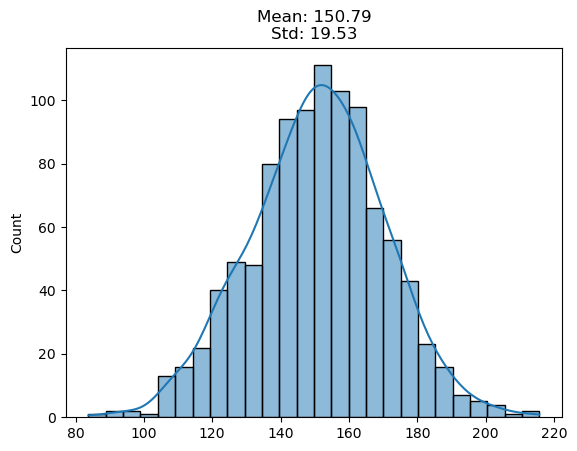

In [58]:
plt.plot(dpi=120)
sns.histplot(normal, kde=True)
plt.title(f"Mean: {normal.mean():.2f}\nStd: {normal.std():.2f}")
plt.show()

In [59]:
def standard_scale_normalization(X):
    normalize = (X - X.mean()) / X.std()
    return normalize

In [61]:
normalize_data = standard_scale_normalization(normal)
normalize_data

array([-9.57798157e-01, -1.61437847e+00,  6.93678919e-01, -1.49564756e+00,
        6.08676611e-01, -1.94873096e+00, -4.95153038e-01, -1.59416232e+00,
        2.73089315e-01,  3.81746821e-01, -5.43233994e-01, -1.79185683e+00,
       -1.70454377e-01,  1.48124707e+00, -1.26249437e+00, -8.68380730e-01,
       -1.63929261e+00, -4.20298259e-01,  1.60151533e+00,  1.70870470e-01,
       -5.67696665e-01, -1.04776907e+00,  8.13659438e-01, -9.28817983e-02,
       -7.05432063e-01,  5.46635044e-01,  2.73223196e+00, -9.42413936e-01,
       -1.22959489e+00, -8.97317394e-01, -3.61245219e-01,  2.58331109e-01,
       -6.38746282e-01,  1.40045161e+00,  9.19547553e-01, -8.30584069e-01,
       -1.02019311e+00, -6.82234023e-01,  7.16108784e-01,  4.83862466e-01,
       -5.12298235e-01, -2.80399202e+00, -6.73439514e-01,  1.20507326e+00,
       -1.18809719e+00,  6.39510420e-01,  1.50289695e-01, -3.09690013e-01,
       -6.94540193e-01, -1.10600076e+00,  7.56741216e-01,  1.07488109e+00,
       -3.34188197e-01, -

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


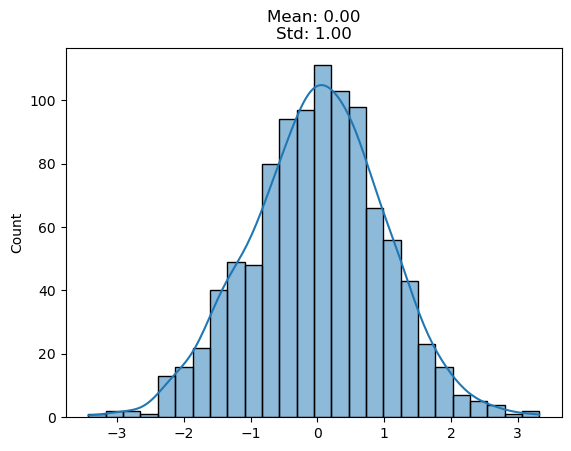

In [62]:
plt.plot(dpi=120)
sns.histplot(normalize_data, kde=True)
plt.title(f"Mean: {normalize_data.mean():.2f}\nStd: {normalize_data.std():.2f}")
plt.show()

In [3]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
normal = np.random.normal(150, 20, 1000)

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


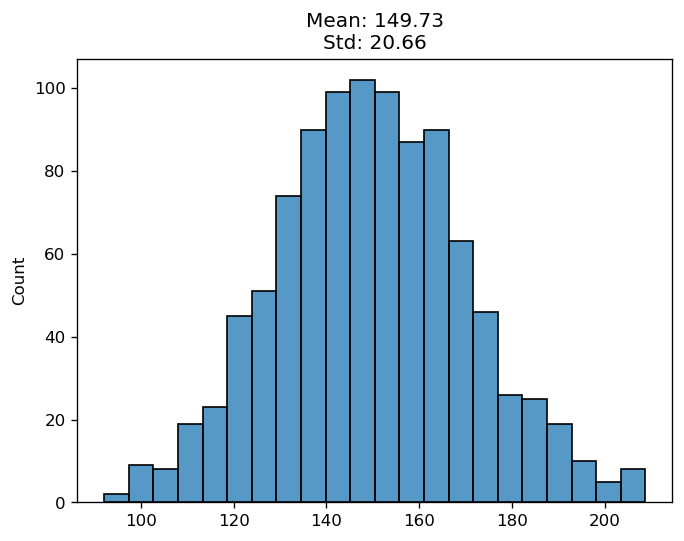

In [13]:
plt.figure(dpi=120)
sns.histplot(normal)
plt.title(f"Mean: {normal.mean():.2f}\nStd: {normal.std():.2f}")
plt.show()

In [6]:
min(normal)

92.08547795641451

In [7]:
max(normal)

208.7793275093415

In [9]:
def standard_scaling_normalization(X):
    normalize_data = (X - X.mean()) / X.std()
    return normalize_data

In [12]:
normalize_data = standard_scaling_normalization(normal)
normalize_data

array([-4.58449113e-01,  1.73717483e+00,  5.17593019e-01, -1.13878058e+00,
       -8.94498935e-01,  1.45082859e-01,  1.33100307e-01, -7.36939614e-01,
        1.03177767e+00,  3.04981360e-01,  1.40469089e+00, -4.66106125e-01,
       -7.92298161e-01, -1.32739068e+00, -5.61051547e-01, -7.96503030e-01,
        1.09823312e+00,  1.60112184e+00,  9.34835134e-01,  1.12416070e+00,
        1.15716793e+00, -1.85580862e+00,  6.36609982e-01, -1.19451597e+00,
        8.84454351e-01, -3.49299564e-01,  1.08046667e+00,  3.50521621e-02,
        6.20563149e-01, -1.55871535e+00,  2.41604849e+00,  1.01155240e+00,
       -1.46043713e+00, -1.06310625e-01,  1.51245193e+00, -1.25995604e+00,
       -4.44086127e-01,  3.99488387e-01, -1.10691481e+00, -5.43795291e-01,
        6.44762980e-01, -1.31366324e+00, -1.32337288e-01, -1.57761409e-01,
        1.19718055e+00, -1.80965516e-01,  7.96452876e-01, -3.30552632e-01,
        2.18782687e-01, -2.42692028e-01, -2.17619879e-02, -7.89548975e-01,
       -8.57997617e-01,  

C:\Users\hello\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


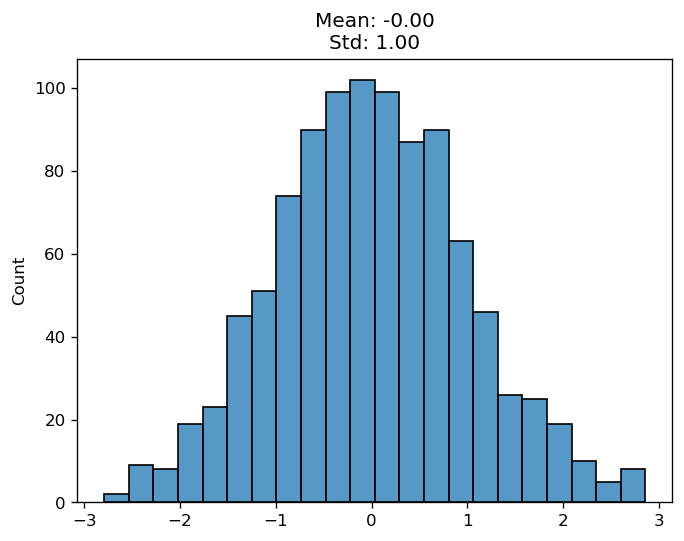

In [14]:
plt.figure(dpi=120)
sns.histplot(normalize_data)
plt.title(f"Mean: {normalize_data.mean():.2f}\nStd: {normalize_data.std():.2f}")
plt.show()

In [15]:
min(normalize_data)

-2.7907563790887444

In [16]:
max(normalize_data)

2.858894248710923

In [17]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
house.dropna(inplace=True)

In [44]:
X = house.drop('median_house_value', axis=1).copy()
y = house.median_house_value

In [45]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [46]:
X_num = X.drop('ocean_proximity', axis=1).copy()
X_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scale = StandardScaler()

In [49]:
scale.fit(X_num)

StandardScaler()

In [50]:
scale.mean_

array([-119.57068859,   35.63322126,   28.63309353, 2636.50423335,
        537.87055254, 1424.94694856,  499.43346547,    3.8711616 ])

In [51]:
scale.var_

array([4.01412790e+00, 4.56375799e+00, 1.58545799e+02, 4.77516937e+06,
       1.77556687e+05, 1.28409863e+06, 1.46145545e+05, 3.60713071e+00])

In [52]:
X_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [53]:
scale.fit_transform(X_num)

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97331952,
        -0.97683327,  2.34516291],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.86133924,
         1.67037262,  2.33263161],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.81976943,
        -0.84342665,  1.78293943],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.36882637,
        -0.17377773, -1.14317103],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.60356386,
        -0.39350628, -1.05513604],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.03348711,
         0.07995643, -0.78060586]])

In [54]:
X_num_scale = scale.fit_transform(X_num)
X_num_scale

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97331952,
        -0.97683327,  2.34516291],
       [-1.32232256,  1.04235526, -0.60621017, ...,  0.86133924,
         1.67037262,  2.33263161],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.81976943,
        -0.84342665,  1.78293943],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.36882637,
        -0.17377773, -1.14317103],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.60356386,
        -0.39350628, -1.05513604],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.03348711,
         0.07995643, -0.78060586]])

In [55]:
scale.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [56]:
X_num_scale = pd.DataFrame(X_num_scale, columns=scale.get_feature_names_out())
X_num_scale

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143
...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136


In [57]:
X_num_scale.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04
mean,-8.457103e-16,1.535632e-15,5.007495e-17,-3.407879e-17,-7.233049e-17,-8.067632e-17,-6.676661e-17,2.948858e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.205604e+00,-1.274093e+00,-1.254828e+00,-1.303810e+00,-1.775054e+00
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-5.429688e-01,-5.740034e-01,-5.629702e-01,-5.739976e-01,-6.884113e-01
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-2.331597e-01,-2.441308e-01,-2.285134e-01,-2.365573e-01,-1.762077e-01
75%,7.789699e-01,9.768213e-01,6.644886e-01,2.317829e-01,2.589843e-01,2.621409e-01,2.735268e-01,4.595713e-01
max,2.625711e+00,2.956885e+00,1.855769e+00,1.678713e+01,1.401871e+01,3.023088e+01,1.460297e+01,5.859665e+00


In [58]:
X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [59]:
X_num_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143


In [60]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor

In [61]:
X_num.dropna(inplace=True)
X_num_scale.dropna(inplace=True)

In [62]:
print("Without Scaling")
SGD = SGDRegressor()
SGD.fit(X_num, y)
y_hat = SGD.predict(X_num)

print(f"Error: {mean_absolute_error(y, y_hat):.2f}")
print(f"Accuracy: {r2_score(y, y_hat):.2f}")

Without Scaling
Error: 1660659069639789.75
Accuracy: -358882322539725389824.00


In [63]:
print("With Scaling")
SGD = SGDRegressor()
SGD.fit(X_num_scale, y)
y_hat = SGD.predict(X_num_scale)

print(f"Error: {mean_absolute_error(y, y_hat):.2f}")
print(f"Accuracy: {r2_score(y, y_hat):.2f}")

With Scaling
Error: 50926.75
Accuracy: 0.64
